In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

In [2]:
# Setup neccessary paths
train_csv = '../data/train.csv'
test_csv = '../data/test.csv'

train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

In [3]:
num_training_examples = len(train_df)
num_test_examples = len(test_df)
num_features = len(train_df.columns) - 1

print('Number of training examples: {}'.format(num_training_examples))
print('Number of test examples: {}'.format(num_test_examples))
print('Number of features: {}'.format(num_features))

Number of training examples: 42000
Number of test examples: 28000
Number of features: 784


In [4]:
num_labels = set(train_df.label)
print('Possible labels: {}'.format(num_labels))

Possible labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


## Data distribution

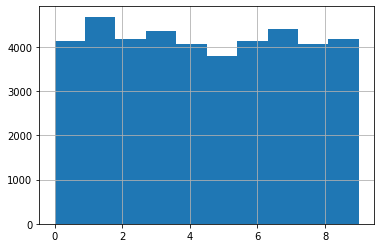

In [5]:
train_df['label'].hist()

([<matplotlib.axis.XTick at 0x7f7e8d8e7d30>,
 <a list of 10 Text xticklabel objects>)

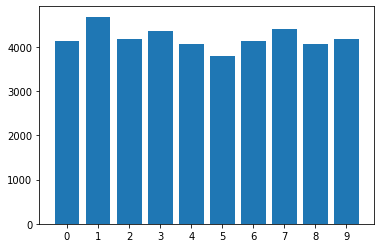

In [6]:
labels = train_df['label'].value_counts(sort=False)

plt.bar(labels.index, labels)
plt.xticks(list(labels.index))

## Visualize random images

In [7]:
import numpy as np
import torch
idxs = np.random.randint(len(train_df), size=10)

In [8]:
print(idxs)

[12880 18011  2573 14919 17433 33529 29613 30471  3976 33480]


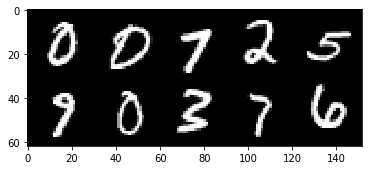

In [9]:
images = train_df.iloc[idxs, 1:].values.astype(np.uint8).reshape(-1, 1, 28, 28)
images_ts = torch.from_numpy(images)

# grid = make_grid(images_ts, nrow=5).permute(1,2,0)
grid = make_grid(images_ts, nrow=5).permute(1,2,0)

plt.imshow(grid)

## Visualize transformations

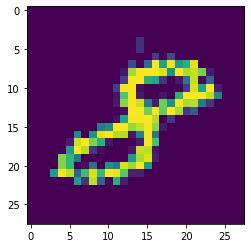

In [14]:
from torchvision import transforms
import PIL

image = train_df.iloc[20, 1:].values.astype(np.uint8).reshape(28,28,1)
pil_image = transforms.ToPILImage()(image)

transform = transforms.Compose([
    transforms.RandomRotation(degrees=30, fill=(0,)),
    transforms.RandomHorizontalFlip()
])

pil_image = transform(pil_image)

plt.imshow(pil_image)